## Sentiment Analysis
----

### Part 1: Logistic regression 

In [1]:
import turicreate as tc

#### Read some products review data
----

In [2]:
products=tc.SFrame('amazon_baby.gl/')

#### Explore reviews

In [3]:
products

name,review,rating
Planetwise Flannel Wipes,"These flannel wipes areOK, but in my opinion ...",3.0
Planetwise Wipe Pouch,it came early and was notdisappointed. i love ...,5.0
Annas Dream Full Quiltwith 2 Shams ...,Very soft and comfortableand warmer than it ...,5.0
Stop Pacifier Suckingwithout tears with ...,This is a product wellworth the purchase. I ...,5.0
Stop Pacifier Suckingwithout tears with ...,All of my kids have criednon-stop when I tried to ...,5.0
Stop Pacifier Suckingwithout tears with ...,"When the Binky Fairy cameto our house, we didn't ...",5.0
A Tale of Baby's Dayswith Peter Rabbit ...,"Lovely book, it's boundtightly so you may no ...",4.0
"Baby Tracker&reg; - DailyChildcare Journal, ...",Perfect for new parents.We were able to keep ...,5.0
"Baby Tracker&reg; - DailyChildcare Journal, ...",A friend of mine pinnedthis product on Pinte ...,5.0
"Baby Tracker&reg; - DailyChildcare Journal, ...",This has been an easy wayfor my nanny to record ...,4.0


In [4]:
products[0]

{'name': 'Planetwise Flannel Wipes',
 'review': 'These flannel wipes are OK, but in my opinion not worth keeping.  I also ordered someImse Vimse Cloth Wipes-Ocean Blue-12 countwhich are larger, had a nicer, softer texture and just seemed higher quality.  I use cloth wipes for hands and faces and have been usingThirsties 6 Pack Fab Wipes, Boyfor about 8 months now and need to replace them because they are starting to get rough and have had stink issues for a while that stripping no longer handles.',
 'rating': 3.0}

In [5]:
products['word_count']=tc.text_analytics.count_words(products['review'])

In [6]:
products['name'].show()

Materializing SArray

In [7]:
giraffe_rev=products[products['name']=='Vulli Sophie the Giraffe Teether']

In [8]:
len(giraffe_rev)

785

In [12]:
giraffe_rev['rating'].show()

Materializing SArray

#### Build a sentiment Clasifier with just two words
----

#### Feature Extraction via BoW

We will build our first sentiment classifier by using just two words: "hate" and "awesome". For this we need to create two binary features which identifies if the written review contains each of these words.

In [9]:
selected_words = ['awesome', 'hate']

In [10]:
def awesome_count(SArray):
    if "awesome" in SArray:
        return SArray["awesome"]
        
def hate_count(SArray):
    if 'hate' in SArray:
        return SArray['hate']

In [11]:
products['awesome'] = products['word_count'].apply(awesome_count)


products['hate'] = products['word_count'].apply(hate_count)

for i in selected_words:
    products[i]=products[i].fillna(value=0)


Let´s examine our new two variables.

In [12]:
products.head(5)

name,review,rating,word_count,awesome,hate
Planetwise Flannel Wipes,"These flannel wipes areOK, but in my opinion ...",3.0,"{'handles': 1.0,'stripping': 1.0, ...",0.0,0.0
Planetwise Wipe Pouch,it came early and was notdisappointed. i love ...,5.0,"{'recommend': 1.0,'moist': 1.0, 'osocozy': ...",0.0,0.0
Annas Dream Full Quiltwith 2 Shams ...,Very soft and comfortableand warmer than it ...,5.0,"{'quilt': 1.0,'comfortable': 1.0, ...",0.0,0.0
Stop Pacifier Suckingwithout tears with ...,This is a product wellworth the purchase. I ...,5.0,"{'tool': 1.0, 'clever':1.0, 'little': 1.0, ...",0.0,0.0
Stop Pacifier Suckingwithout tears with ...,All of my kids have criednon-stop when I tried to ...,5.0,"{'rock': 1.0, 'many':1.0, 'headaches': 1.0, ...",0.0,0.0


In [20]:
print("Num total Awesome: ", products["awesome"].sum())
print("Num total Awesome: ", products["hate"].sum())

Num total Awesome:  4075.0
Num total Awesome:  1285.0


In [13]:
## Filter ratings equal to 3 stars.
products=products[products['rating']!=3]

## Create a binary target variable, 1 for ratings 4 or 5. And 0 for ratings 1 or 2.
products['sentiment']=products['rating']>=4

In [14]:
## Let´s check our new dataset
products.head(5)

name,review,rating,word_count,awesome,hate,sentiment
Planetwise Wipe Pouch,it came early and was notdisappointed. i love ...,5.0,"{'recommend': 1.0,'moist': 1.0, 'osocozy': ...",0.0,0.0,1
Annas Dream Full Quiltwith 2 Shams ...,Very soft and comfortableand warmer than it ...,5.0,"{'quilt': 1.0,'comfortable': 1.0, ...",0.0,0.0,1
Stop Pacifier Suckingwithout tears with ...,This is a product wellworth the purchase. I ...,5.0,"{'tool': 1.0, 'clever':1.0, 'little': 1.0, ...",0.0,0.0,1
Stop Pacifier Suckingwithout tears with ...,All of my kids have criednon-stop when I tried to ...,5.0,"{'rock': 1.0, 'many':1.0, 'headaches': 1.0, ...",0.0,0.0,1
Stop Pacifier Suckingwithout tears with ...,"When the Binky Fairy cameto our house, we didn't ...",5.0,"{'thumb': 1.0, 'or': 1.0,'break': 1.0, 'trying': ...",0.0,0.0,1


In [15]:
## As usual, lets split the data into training and testing.

train_data,test_data = products.random_split(.9, seed=0)

In [16]:
initial_model=tc.logistic_classifier.create(train_data,
                                                        target='sentiment',
                                                        features=["awesome", "hate"],
                                                        validation_set=test_data)

Logistic regression:

--------------------------------------------------------

Number of examples          : 149839

Number of classes           : 2

Number of feature columns   : 2

Number of unpacked features : 2

Number of coefficients      : 3

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+--------------+-------------------+---------------------+

| 1         | 2        | 1.469971     | 0.841256          | 0.840892            |

| 2         | 3        | 1.711219     | 0.841263          | 0.840892            |

| 3         | 4        | 1.957086     | 0.841263          | 0.840892            |

| 4         | 5        | 2.257393     | 0.841263          | 0.840892            |

| 5         | 6        | 2.564672     | 0.841263          | 0.840892            |

+-----------+----------+--------------+-------------------+---------------------+

SUCCESS: Optimal solution found.

In [17]:
## Final Model Accuracy on Test Data:
initial_model.evaluate(test_data, metric='accuracy')

{'accuracy': 0.8408916218293621}

#### Build a sentiment Clasifier using all tokens
-----
This time we will create a classifier but using all tokens available in the training data.

In [18]:
products=tc.SFrame('amazon_baby.gl/')
products=products[products['rating']!=3]
products['sentiment']=products['rating']>=4

In [19]:
products['word_count']=tc.text_analytics.count_words(products['review'])

In [20]:
products[0]

{'name': 'Planetwise Wipe Pouch',
 'review': 'it came early and was not disappointed. i love planet wise bags and now my wipe holder. it keps my osocozy wipes moist and does not leak. highly recommend it.',
 'rating': 5.0,
 'sentiment': 1,
 'word_count': {'recommend': 1.0,
  'moist': 1.0,
  'osocozy': 1.0,
  'keps': 1.0,
  'leak': 1.0,
  'holder': 1.0,
  'was': 1.0,
  'now': 1.0,
  'wipe': 1.0,
  'my': 2.0,
  'disappointed': 1.0,
  'wise': 1.0,
  'and': 3.0,
  'planet': 1.0,
  'it': 3.0,
  'love': 1.0,
  'early': 1.0,
  'not': 2.0,
  'highly': 1.0,
  'wipes': 1.0,
  'bags': 1.0,
  'came': 1.0,
  'does': 1.0,
  'i': 1.0}}

In [21]:
products=products[products['rating']!=3]
products['sentiment']=products['rating']>=4

In [22]:
training_data,test_data = products.random_split(.8,seed=0)

In [23]:
sentiment_model=tc.logistic_classifier.create(training_data,
                                                   target='sentiment',
                                                   features=['word_count'],
                                                  validation_set=test_data)

Logistic regression:

--------------------------------------------------------

Number of examples          : 133448

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 57356

Number of coefficients      : 57357

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 4        | 0.250000  | 2.028761     | 0.841421          | 0.840019            |

| 1         | 9        | 3.250000  | 5.179080     | 0.931359          | 0.911362            |

| 2         | 11       | 2.669978  | 6.264880     | 0.938650          | 0.916466            |

| 3         | 12       | 2.669978  | 6.983104     | 0.927417          | 0.901814            |

| 4         | 14       | 1.326072  | 8.117960     | 0.945200          | 0.918088            |

| 9         | 20       | 1.326072  | 12.398137    | 0.977654          | 0.917698            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

In [36]:
sentiment_model.evaluate(test_data, metric='accuracy')

{'accuracy': 0.9176975738650012}

#### Test in an unseen Review
----
We will write a completely random review and check how it is scored by our recommender.

In [26]:
Juan_review=tc.SArray(["I fucking hate it"])
d=tc.SFrame({'word_count': tc.text_analytics.count_words(Juan_review)})

In [27]:
sentiment_model.predict(d, output_type='probability')

dtype: float
Rows: 1
[0.31950256132830424]

## Part 2: Sentiment Analysis with a FNN
----

In [28]:
import pandas as pd
import turicreate as tc
import tensorflow as tf
import numpy as np


#### Feature extraction
----

In [29]:
products=tc.SFrame('amazon_baby.gl/')

In [30]:
products=products[products['rating']!=3]
products['label']=products['rating']>=4
products=pd.DataFrame(products)

In [32]:
sentences = products['review'].tolist()
labels = products['label'].tolist()

In [33]:
# Separate out the sentences and labels into training and test sets
training_size = int(len(sentences) * 0.8)

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

# Make labels into numpy arrays for use with the network later
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)


In [34]:
# Define Neural Network parameters 

vocab_size = 1000
embedding_dim = 24
max_length = 50
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

## Identify Tokens for all training sentences:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok, lower=True)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

## Transform training reviews into sequences:  
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, padding=padding_type, 
                       truncating=trunc_type)

## Transform testing reviews into sequences: 
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length, 
                               padding=padding_type, truncating=trunc_type)

In [35]:
## Verify it works:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(padded[1]))
print(training_sentences[1])

very soft and comfortable and warmer than it looks fit the full size bed perfectly would recommend to anyone looking for this type of <OOV> ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
Very soft and comfortable and warmer than it looks...fit the full size bed perfectly...would recommend to anyone looking for this type of quilt


#### Training Neural Network for sentiment analysis
----

In [36]:
# Build a basic sentiment network
# Note the embedding layer is first, 
# and the output is only 1 node as it is either 0 or 1 (negative or positive)

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Take Note:
# 1. The Function Sequential() creates our computational graph.
# 2. The Embidding Layer takes a strictly defined input shape.
# 3. Activation function sigmoid and ReLU


In [37]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 24)            24000     
_________________________________________________________________
flatten (Flatten)            (None, 1200)              0         
_________________________________________________________________
dense (Dense)                (None, 6)                 7206      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 31,213
Trainable params: 31,213
Non-trainable params: 0
_________________________________________________________________


In [38]:
num_epochs = 10

history=model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
4169/4169 [==============================] - 19s 4ms/step - loss: 0.2686 - accuracy: 0.8881 - val_loss: 0.2190 - val_accuracy: 0.9103
Epoch 2/10
4169/4169 [==============================] - 19s 5ms/step - loss: 0.2328 - accuracy: 0.9022 - val_loss: 0.2171 - val_accuracy: 0.9121
Epoch 3/10
4169/4169 [==============================] - 18s 4ms/step - loss: 0.2149 - accuracy: 0.9101 - val_loss: 0.2260 - val_accuracy: 0.9103
Epoch 4/10
4169/4169 [==============================] - 18s 4ms/step - loss: 0.1980 - accuracy: 0.9162 - val_loss: 0.2375 - val_accuracy: 0.9050
Epoch 5/10
4169/4169 [==============================] - 15s 4ms/step - loss: 0.1831 - accuracy: 0.9222 - val_loss: 0.2547 - val_accuracy: 0.9051
Epoch 6/10
4169/4169 [==============================] - 19s 5ms/step - loss: 0.1711 - accuracy: 0.9272 - val_loss: 0.2697 - val_accuracy: 0.9011
Epoch 7/10
4169/4169 [==============================] - 18s 4ms/step - loss: 0.1608 - accuracy: 0.9311 - val_loss: 0.2844 - val_ac

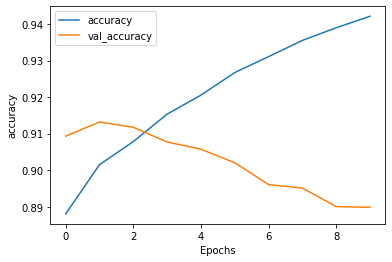

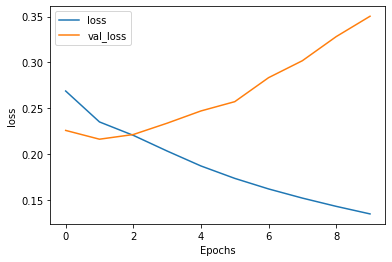

In [59]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

#### Tweaking the model
----

In [63]:
# Build a basic sentiment network
# Note the embedding layer is first, 
# and the output is only 1 node as it is either 0 or 1 (negative or positive)


model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [65]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 50, 24)            24000     
_________________________________________________________________
global_average_pooling1d_2 ( (None, 24)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 150       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 7         
Total params: 24,157
Trainable params: 24,157
Non-trainable params: 0
_________________________________________________________________


In [66]:
num_epochs = 10
history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
4169/4169 [==============================] - 8s 2ms/step - loss: 0.3048 - accuracy: 0.8738 - val_loss: 0.2264 - val_accuracy: 0.9081
Epoch 2/10
4169/4169 [==============================] - 9s 2ms/step - loss: 0.2477 - accuracy: 0.8956 - val_loss: 0.2213 - val_accuracy: 0.9093
Epoch 3/10
4169/4169 [==============================] - 9s 2ms/step - loss: 0.2437 - accuracy: 0.8975 - val_loss: 0.2203 - val_accuracy: 0.9109oss: 0.2436 - ac
Epoch 4/10
4169/4169 [==============================] - 9s 2ms/step - loss: 0.2417 - accuracy: 0.8979 - val_loss: 0.2228 - val_accuracy: 0.9097
Epoch 5/10
4169/4169 [==============================] - 9s 2ms/step - loss: 0.2402 - accuracy: 0.8979 - val_loss: 0.2217 - val_accuracy: 0.9089:  - ETA
Epoch 6/10
4169/4169 [==============================] - 8s 2ms/step - loss: 0.2391 - accuracy: 0.8985 - val_loss: 0.2202 - val_accuracy: 0.91000s - loss: 0.2392 - 
Epoch 7/10
4169/4169 [==============================] - 14s 3ms/step - loss: 0.2378 - accura

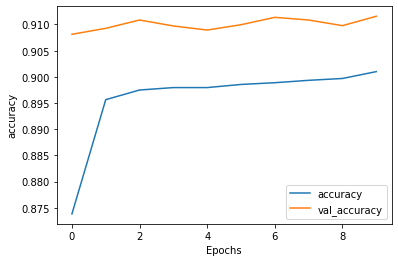

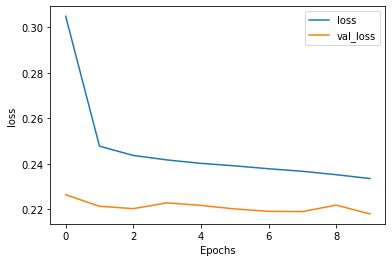

In [67]:
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

## Sentiment Analysis with RNN
### Add a bidirectional LSTM
-----

Create a new model that uses a bidirectional LSTM.

Then use the function we have already defined to compile the model, train it, graph the accuracy and loss, then predict some results.

In [ ]:
# DO NOT RUN ON CPU
# Define the model
Don´t run

model_bidi_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)), 
    tf.keras.layers.Dense(6, activation='relu'), 
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile and train the model and then show the predictions for our extra sentences
fit_model_and_show_results(model_bidi_lstm, fake_reviews)


In [ ]:
# DO NOT RUN ON CPU
# Define the model with two bidirectional LSTM layers
Don´t run

model_multiple_bidi_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim, 
                                                       return_sequences=True)), 
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

fit_model_and_show_results(model_multiple_bidi_lstm, fake_reviews)